In [1]:
import project59970 as proj
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
co2_df = proj.create_dataframe()
co2_df.head()

,YYYY,MM,DD,DATE,CO2(ppm),SD(ppm),Source
0,1976,5.0,15.0,1976.3689,328.861,0.165,in situ
1,1976,6.0,15.0,1976.4536,328.988,0.285,in situ
2,1976,7.0,15.0,1976.5355,329.653,0.282,in situ
3,1976,8.0,15.0,1976.6202,330.550,0.201,in situ
4,1976,9.0,15.0,1976.7049,330.872,0.234,in situ


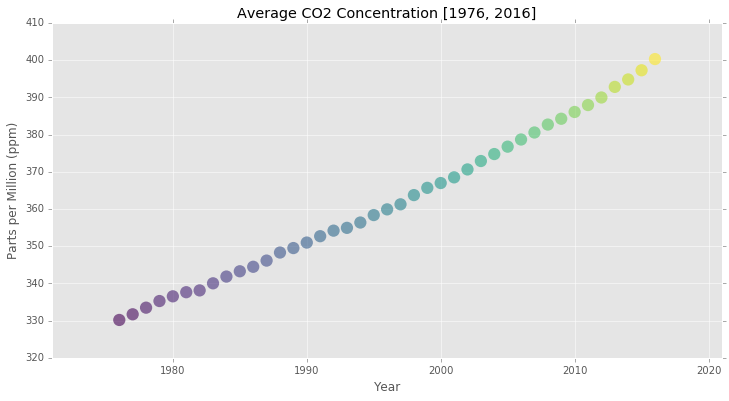

In [3]:
proj.plot_avg_carbon_concentration(co2_df, 1976, 2016)

## Linear Regression

In [4]:
import sklearn.linear_model as lm

# create linear regression model
lr = lm.LinearRegression()

years = np.arange(1976, 2017)
ppms = co2_df.groupby(['YYYY']).mean()['CO2(ppm)']
ppms = ppms[ppms.notnull()].values

# fit model to our training set
# numpy newaxis converts an array into a column vector
# conventionally, obcservations are rows and features are columns
lr.fit(years[:, np.newaxis], ppms)

# predict points
future_years = np.arange(1976, 2031)
ppms_lr = lr.predict(future_years[:, np.newaxis])

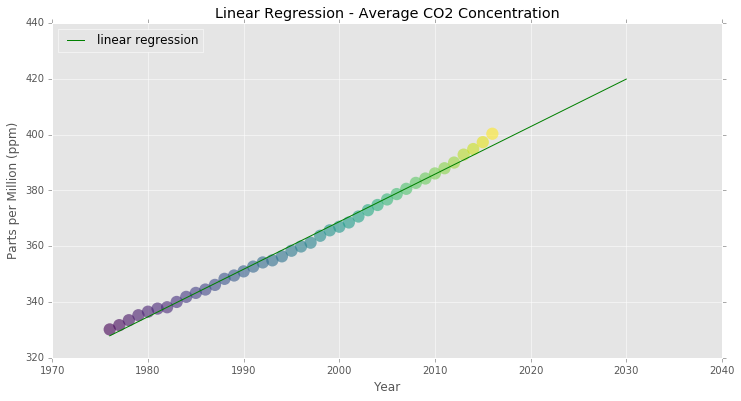

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(years, ppms, c=ppms, s = 150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.plot(future_years, ppms_lr, c='green', label='linear regression')
plt.legend(loc=2)
plt.grid(True)
plt.title("Linear Regression - Average CO2 Concentration")
plt.xlabel("Year")
plt.ylabel("Parts per Million (ppm)")
plt.show()

### In this regression plot, we can see the atmospheric concentration of carbon dioxide is increasing near linearly, and by the year 2030, the CO2 concentration is projected to be about 420 ppm.

In [31]:
global_temperatures = proj.create_dataframe(dates='dt')
us_temperatures = global_temperatures[global_temperatures['Country']=='United States']
us_temperatures['dt'] = us_temperatures['dt'].apply(lambda x: x.year)
us_temperatures = us_temperatures[(us_temperatures['dt']>=1976) & (us_temperatures['dt']<=2013)]

us_temperatures.head()

/home/brandon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
557368,1976,-3.876,0.112,United States
557369,1976,0.256,0.165,United States
557370,1976,2.940,0.173,United States
557371,1976,8.575,0.165,United States
557372,1976,13.308,0.336,United States


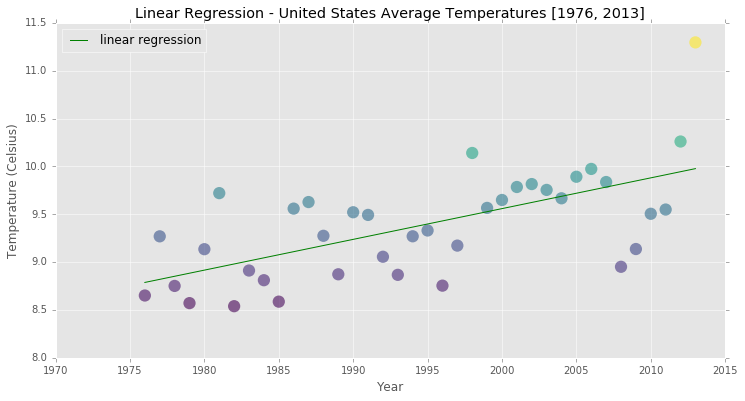

In [32]:
years = np.arange(1976, 2014)
temps = us_temperatures.groupby(['dt']).mean()['AverageTemperature'].values

lr = lm.LinearRegression()
lr.fit(years[:, np.newaxis], temps)
temps_lr = lr.predict(years[:, np.newaxis])

plt.figure(figsize=(12, 6))
plt.scatter(years, temps, c=temps, s = 150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.plot(years, temps_lr, c='green', label='linear regression')
plt.legend(loc=2)
plt.grid(True)
plt.title("Linear Regression - United States Average Temperatures [1976, 2013]")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

### Now, if we look at just the United States, the average annual temperatures are increasing between the years 1976 and 2013.  This demonstrates a correlation between atmospheric CO2 concentration and temperature warming.

### Where is this CO2 coming from?

In [55]:
us_emissions_df = proj.create_dataframe(dates='Date')
us_emissions_df.head()

,Date,Total,Solid,Liquid,Gas
0,1981-01-00,125.4146,37.14631,54.74525,33.52304
1,1981-02-00,105.9197,32.83404,45.20624,27.87945
2,1981-03-00,107.1396,33.01786,46.17714,27.94459
3,1981-04-00,94.9415,30.03870,43.01047,21.89235
4,1981-05-00,95.2932,30.24551,44.06372,20.98399


In [56]:
us_emissions_df['Date'] = us_emissions_df['Date'].apply(lambda x: int(x[0:4]))

In [79]:
total = us_emissions_df.groupby(['Date']).mean().reset_index()[' Total'].values
solid = us_emissions_df.groupby(['Date']).mean().reset_index()[' Solid'].values
liquid = us_emissions_df.groupby(['Date']).mean().reset_index()[' Liquid'].values
gas = us_emissions_df.groupby(['Date']).mean().reset_index()[' Gas'].values

# convert to million metric tons CO2
total *= 3.667    
solid *= 3.667
liquid *= 3.667
gas *= 3.667

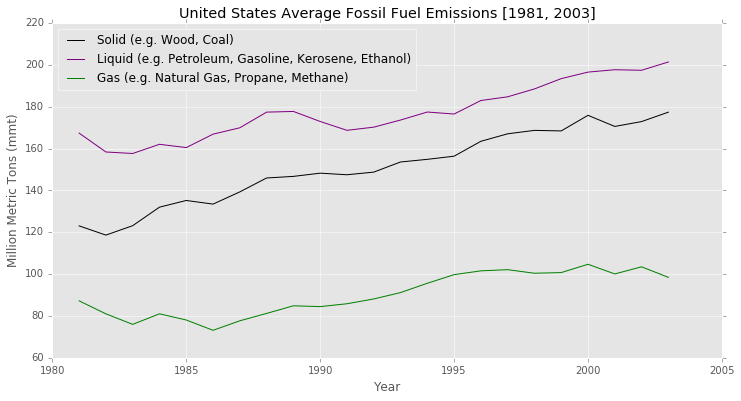

In [81]:
years = np.arange(1981, 2004)

plt.figure(figsize=(12, 6))
plt.plot(years, solid, c='black', label='Solid (e.g. Wood, Coal)')
plt.plot(years, liquid, c='purple', label='Liquid (e.g. Petroleum, Gasoline, Kerosene, Ethanol)')
plt.plot(years, gas, c='green', label='Gas (e.g. Natural Gas, Propane, Methane)')
plt.legend(loc='best')
plt.grid(True)
plt.title("United States Average Fossil Fuel Emissions [1981, 2003]")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons (mmt)")
plt.show()

### After the industrial revolution, fossil fuel combustion has skyrocketed to power many of today's most important technologies.  While these technologies bring great changes and are mostly beneficial, industries are emitting more and more greenhouse gases, having detrimental and irreversible effects. 

### Here we observe the United States alone, one of the world's largest consumers of fossil fuels and CO2 emitters.